In [2]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import Data

In [5]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [6]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


# iModulons capturing known regulons/operons 

## BfmR-BfmS iModulon and csu pili operon 

<AxesSubplot:xlabel='Gene Start', ylabel='BfmR-BfmS Gene Weight'>

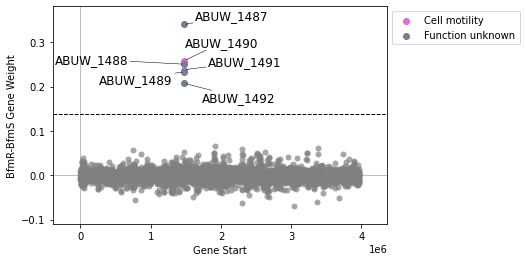

In [7]:
plot_gene_weights(ica_data, 'BfmR-BfmS')
#plt.savefig("../figures/Figure2_BfmRBfmS.svg")

In [33]:
ica_data.view_imodulon('BfmR-BfmS')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,accession,ncbi_protein,new_locus_tag,new_accession
ABUW_1487,0.339775,ABUW_1487,NaN,1474362,1474898,+,CsuA/B,Function unknown,NaN,"BfmR-BfmS,AbaM",CP008706.1,AKA31227.1,ABUW_RS07250,NZ_CP008706.1
ABUW_1488,0.250313,ABUW_1488,NaN,1474973,1475521,+,CsuA,Function unknown,NaN,"BfmR-BfmS,AbaM",CP008706.1,AKA31228.1,ABUW_RS07255,NZ_CP008706.1
ABUW_1489,0.233299,ABUW_1489,NaN,1475527,1476045,+,CsuB,Function unknown,NaN,"BfmR-BfmS,GacA-GacS,AbaM",CP008706.1,AKA31229.1,ABUW_RS07260,NZ_CP008706.1
ABUW_1490,0.258293,ABUW_1490,NaN,1476051,1476872,+,CsuC,Cell motility,NaN,"GacA-GacS,BfmR-BfmS,AbaM",CP008706.1,AKA31230.1,ABUW_RS07265,NZ_CP008706.1
ABUW_1491,0.237916,ABUW_1491,NaN,1476869,1479367,+,CsuD,Cell motility,NaN,"BfmR-BfmS,AbaM",CP008706.1,AKA31231.1,ABUW_RS07270,NZ_CP008706.1
ABUW_1492,0.207170,ABUW_1492,NaN,1479364,1480383,+,CsuE,Function unknown,NaN,"BfmR-BfmS,AbaM",CP008706.1,AKA31232.1,ABUW_RS07275,NZ_CP008706.1


## LldR iModulon and LldR regulon 

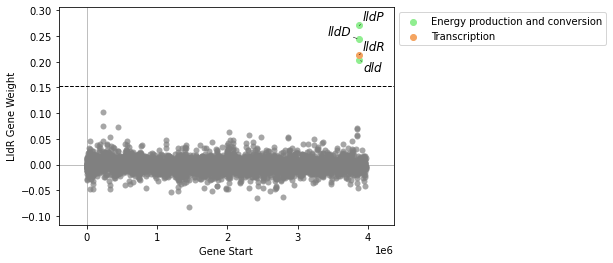

In [7]:
plot_gene_weights(ica_data, 'LldR')
#plt.savefig("../figures/Figure2_LldR.svg")

In [9]:
ica_data.view_imodulon('LldR')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_3811,0.204352,dld,NaN,3872632,3874338,-,D-lactate dehydrogenase,Energy production and conversion,NaN,LldR
ABUW_3812,0.243603,lldD,NaN,3874665,3875816,-,L-lactate dehydrogenase (cytochrome),Energy production and conversion,NaN,LldR
ABUW_3813,0.213870,lldR,NaN,3875813,3876565,-,L-lactate utilization transcriptional repressor,Transcription,NaN,LldR
ABUW_3814,0.270668,lldP,NaN,3876585,3878246,-,L-lactate permease,Energy production and conversion,NaN,NaN


# RpoH iModulon

## Compare Abaum iModulons to PRECISE 2.0 E.coli iMods

In [8]:
from pymodulon import example_data
from pymodulon.compare import *
import os
from os import path

In [9]:
#load BBH file
bbh_ecoli = pd.read_csv("../data/run4/external/acb_vs_eco.csv")
bbh_ecoli.head()

,Unnamed: 0,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
0,0,ABUW_0001,b3702,47.537,467,238,3,2,465,5,467,5.870000e-156,447.0,465,1.004301,<=>
1,2,ABUW_0002,b3701,45.431,383,191,7,1,382,1,366,2.560000e-104,309.0,382,1.002618,<=>
2,3,ABUW_0003,b3700,34.530,362,225,5,1,356,1,356,3.210000e-63,202.0,360,1.005556,<=>
3,4,ABUW_0004,b3699,67.413,804,251,5,18,818,4,799,0.000000e+00,1070.0,822,0.978102,<=>
4,12,ABUW_0007,b3352,52.821,638,292,3,1,637,1,630,0.000000e+00,669.0,643,0.992224,<=>


In [10]:
#load ecoli PRECISE 2.0 iModulome .json file
ecoli_ica = load_json_model('../data/external/precise2.json')

In [11]:
ecoli_ica.M.head()

,e14 Removal,SG_yzfA,SG_ytiD,Membrane-1,CysB-1,CueR/CusR/HprR,DLP12,SG_yqhI,SG_icdC,NQ-ALE3,...,SG_cspH,SG_ymcE,OmpR,NarL,NtrC+RpoS,SG_ybfQ,SG_ynaM,GlpR-2,PdeL,SG_sgrT
b0002,-0.000358,-0.008590,0.003601,-0.012687,0.005562,-0.008805,0.001628,-0.002981,-0.005618,0.002741,...,0.007893,0.007961,0.006694,-0.007216,-0.012779,0.009632,0.000493,0.000036,-0.021155,-0.011153
b0003,-0.010837,0.001999,0.011521,0.002356,0.005713,-0.004448,-0.006117,0.014313,0.006507,-0.001974,...,-0.011125,-0.002493,0.020232,0.015658,-0.004292,0.004611,0.017251,-0.008580,0.008200,-0.001142
b0004,-0.011196,0.010332,0.010215,0.008323,0.002182,-0.004335,-0.001893,0.002386,0.008030,0.002420,...,-0.006413,-0.000588,0.015639,0.012891,-0.000049,0.008568,0.012664,-0.007649,0.014636,-0.008665
b0005,0.001831,0.008297,-0.006886,0.008113,-0.000454,0.004255,0.031781,-0.000679,0.005952,0.011142,...,-0.011150,0.009998,-0.003796,0.023029,-0.008983,-0.002186,-0.008396,-0.003082,0.001796,-0.007888
b0006,0.009458,-0.002019,0.015016,-0.005517,-0.004051,-0.000016,0.002706,0.005039,0.007791,-0.008338,...,-0.002731,0.002148,0.010465,0.007808,0.002363,0.007910,-0.000523,0.002802,0.011354,-0.002649


In [12]:
links,dots = compare_ica(ica_data.M,ecoli_ica.M,
                         ortho_file = bbh_ecoli)

In [13]:
links

[('NDH-1', 'Cytochrome bo3', 0.29807764618564236),
 ('NDH-1', 'NDH-1', 0.4482441966592486),
 ('PhoR-PhoB', 'PhoB-1', 0.2990158609952629),
 ('Fur-2', 'Fur-1', 0.5522274009028179),
 ('Fur-2', 'FecI', 0.3235000261244597),
 ('Fur-2', 'Fe-related-3', 0.3711168795626413),
 ('Cbl/GigC', 'CysB-1', 0.32114414509756584),
 ('Cbl/GigC', 'CysB+Cbl', 0.6739221268335182),
 ('ABUW_1645', 'RpoS', 0.2748700641119044),
 ('GacA-GacS', 'RpoS', 0.35154611163772487),
 ('Translation', 'Translation', 0.7680193090558497),
 ('PaaX', 'PaaX', 0.7285246684874993),
 ('KpdD-KpdE', 'KdpE', 0.6831980426512025),
 ('ppGpp', 'ppGpp', 0.35913601746225643),
 ('RpoH', 'RpoH', 0.6227948911700172),
 ('LldR', 'LldR+ArcA', 0.538745658250572),
 ('cyd', 'Cytochrome bd-I', 0.4157073879778688)]

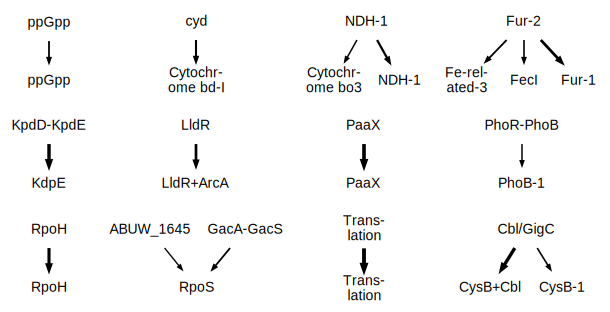

In [14]:
dots

# Comparing Abaum iModulons to P. aeruginosa iModulons

In [15]:
#Load BBH file
bbh_paeru = pd.read_csv("../data/external/acb_vs_pae.csv")
bbh_paeru.head()

,Unnamed: 0,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
0,0,ABUW_0001,PA0001,45.205,511,232,3,2,465,5,514,1.580000e-145,423.0,465,1.098925,<=>
1,2,ABUW_0002,PA0002,47.781,383,183,6,1,382,1,367,4.320000e-113,332.0,382,1.002618,<=>
2,3,ABUW_0003,PA0003,37.190,363,218,5,1,356,1,360,2.400000e-71,224.0,360,1.008333,<=>
3,4,ABUW_0004,PA0004,65.169,801,270,4,18,816,6,799,0.000000e+00,1042.0,822,0.974453,<=>
4,11,ABUW_0007,PA5252,57.076,643,267,4,1,642,1,635,0.000000e+00,677.0,643,1.000000,<=>


In [16]:
#load paeru iModulome .json file
paeru_ica = load_json_model('../data/external/paeru.json')

In [17]:
paeru_ica.M.head()

,NarL-1,DhcR,Uncharacterized-1,EatR,AtuR,HexR-1,ArgR-1,AntR,EutR,PmrA,...,Cell Division,MdcR,LexA,AmiR,Uncharacterized-14,Uncharacterized-15,Uncharacterized-16,Translational-3,AcoR,Uncharacterized-17
PA0001,-0.001776,-0.011492,-0.005810,-0.001476,0.008095,-0.000116,0.004975,-0.006371,0.005519,0.000459,...,0.000992,-0.007524,0.000380,0.004427,-0.002329,-0.016018,0.003467,-0.005188,-0.002881,-0.001487
PA0002,-0.005393,-0.007495,0.001312,-0.005358,0.012951,-0.000871,0.000518,-0.005964,0.001841,-0.001805,...,0.001211,-0.009940,0.004650,0.003710,0.000914,-0.012555,0.002640,-0.016360,-0.002205,0.000764
PA0003,0.007267,-0.012053,-0.015541,-0.007606,-0.005152,-0.001478,-0.003191,0.001838,0.003252,-0.001066,...,-0.006437,-0.007080,-0.002707,0.007270,0.008534,-0.004491,-0.007109,-0.008023,0.014357,-0.003496
PA0004,0.001858,-0.001039,-0.002193,-0.002362,-0.002556,0.001095,-0.001135,-0.000930,-0.007366,-0.001120,...,0.002295,-0.005862,0.007707,-0.000782,-0.002567,-0.004380,0.000110,-0.014077,0.005730,0.000165
PA0005,-0.005459,0.001290,0.005342,0.002208,-0.006422,-0.002729,-0.005139,-0.007693,-0.010484,-0.002262,...,0.002799,0.015157,0.000340,-0.004168,0.008806,-0.007766,-0.006480,-0.004821,0.003796,-0.010534


In [18]:
links,dots = compare_ica(ica_data.M,paeru_ica.M,
                         ortho_file = bbh_paeru)
links

[('Fur-1', 'FoxR', 0.26644616627442),
 ('BfmR-BfmS', 'PprB', 0.41139741605378427),
 ('Fur-2', 'PchR', 0.3222475534128432),
 ('Fur-2', 'FoxR', 0.3286526112447576),
 ('Cbl/GigC', 'CysB-1', 0.2995627853427711),
 ('Cbl/GigC', 'CysB-2', 0.6073559750383567),
 ('ABUW_1645', 'RpoS-1', 0.2781891379209203),
 ('Acetoin/butanediol', 'AcoR', 0.2771925111823802),
 ('adeB KO', 'TagR1', 0.313406528048797),
 ('Tyrosine', 'PhhR', 0.39615544816516185),
 ('mumR', 'AmiE', 0.4446398140193331),
 ('Translation', 'Translational-1', 0.7371105052328873),
 ('Type IV Pili', 'AmrZ', 0.38211046221618383),
 ('Unc-9', 'ErbR-1', 0.2672900431389409),
 ('Leucine', 'LiuR', 0.5009168988126085),
 ('KpdD-KpdE', 'PhnR-2', 0.43677568012100676),
 ('ppGpp', 'Translational-3', 0.45805401150394465),
 ('RpoH', 'RpoH', 0.4850851454663471)]

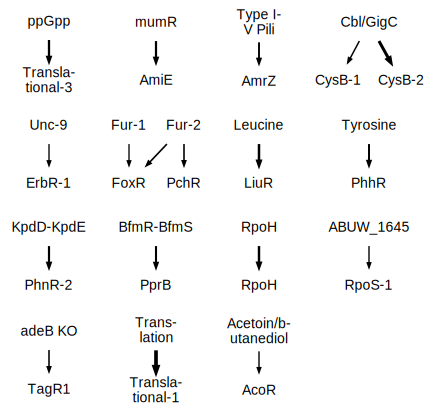

In [19]:
dots

## Comparing gene weights of RpoH from E. coli 

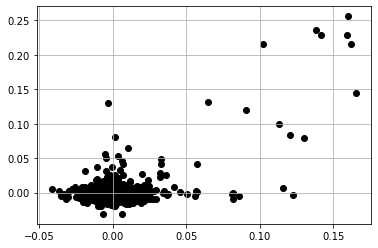

In [22]:
ecoliM = ica_data.M.loc[ica_data.M.index.intersection(bbh_ecoli.gene.values)]
ecoliM = ecoliM.rename(index = dict(bbh_ecoli[['gene','subject']].values)).drop(['b2624', 'b0769'])
plt.scatter(ecoliM['RpoH'],ecoli_ica.M.loc[ecoliM.index,'RpoH'], c='black')
plt.grid()
#plt.savefig("../figures/SuppFigure1a.svg",transparent=True)

## Comparing gene weights of RpoH from P. aeruginosa 

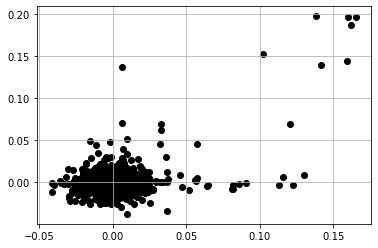

In [23]:
paeruM = ica_data.M.loc[ica_data.M.index.intersection(bbh_paeru.gene.values)]
paeruM = paeruM.rename(index = dict(bbh_paeru[['gene','subject']].values))
plt.scatter(paeruM['RpoH'],paeru_ica.M.loc[paeruM.index,'RpoH'], c='black')
plt.grid()
#plt.savefig("../figures/SuppFigure1b.svg",transparent=True)

# RpoH gene weight plot

<AxesSubplot:xlabel='Gene Start', ylabel='RpoH Gene Weight'>

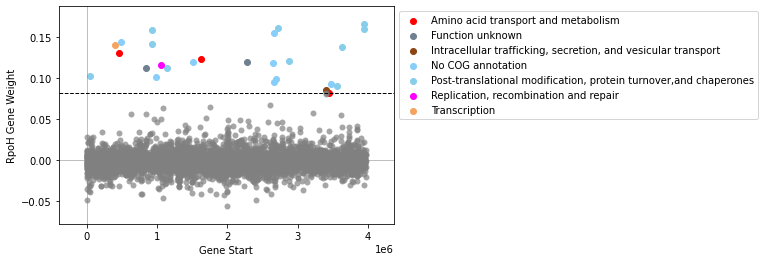

In [27]:
plot_gene_weights(ica_data, 'RpoH')
#plt.savefig("../figures/Figure2_RpoH01.svg")

In [28]:
ica_data.view_imodulon('RpoH')

,gene_weight,gene_name,old_locus_tag,start,stop,strand,gene_product,COG,uniprot,regulator,accession,ncbi_protein,new_locus_tag,new_accession,operon
ABUW_0037,0.102268,dnaJ,NaN,45270,46382,+,chaperone protein DnaJ,"Post-translational modification, protein turno...",NaN,NaN,CP008706.1,AKA29832.1,ABUW_RS00180,NZ_CP008706.1,Op25
ABUW_0372,0.140620,ABUW_0372,NaN,395481,395735,-,phage shock protein C,Transcription,NaN,NaN,CP008706.1,AKA30158.1,ABUW_RS01825,NZ_CP008706.1,None
ABUW_0443,0.130309,prlC,NaN,455176,457215,-,oligopeptidase A,Amino acid transport and metabolism,NaN,NaN,CP008706.1,AKA30229.1,ABUW_RS02175,NZ_CP008706.1,Op242
ABUW_0469,0.143633,ABUW_0469,NaN,481565,482092,-,hypothetical protein,No COG annotation,NaN,NaN,CP008706.1,AKA30251.1,ABUW_RS02305,NZ_CP008706.1,Op255
ABUW_0861,0.112974,ABUW_0861,NaN,840917,841204,-,hypothetical protein,Function unknown,NaN,NaN,CP008706.1,AKA30621.1,ABUW_RS04225,NZ_CP008706.1,Op460
ABUW_0917,0.159285,groS,NaN,923186,923476,+,chaperonin GroS,"Post-translational modification, protein turno...",NaN,NaN,CP008706.1,AKA30674.1,ABUW_RS04500,NZ_CP008706.1,Op490
ABUW_0918,0.141516,groL,NaN,923535,925169,+,chaperonin GroL,"Post-translational modification, protein turno...",NaN,NaN,CP008706.1,AKA30675.1,ABUW_RS04505,NZ_CP008706.1,Op491
ABUW_0971,0.101392,ABUW_0971,NaN,981801,982742,-,hypothetical protein,No COG annotation,NaN,NaN,CP008706.1,AKA30725.1,ABUW_RS04760,NZ_CP008706.1,Op519
ABUW_1047,0.115477,uvrB,NaN,1054773,1056794,+,excinuclease ABC%2C B subunit,"Replication, recombination and repair",NaN,NaN,CP008706.1,AKA30800.1,ABUW_RS05140,NZ_CP008706.1,Op554
ABUW_1119,0.112237,ABUW_1119,NaN,1140333,1141295,+,peptidase S49,"Post-translational modification, protein turno...",NaN,NaN,CP008706.1,AKA30871.1,ABUW_RS05475,NZ_CP008706.1,Op595


## Activity analysis in Kanamycin  

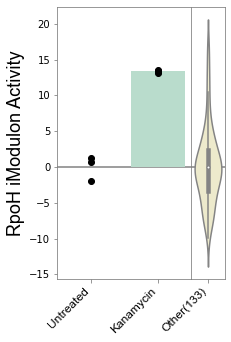

In [61]:
from pymodulon import io

import itertools as it
from collections import OrderedDict
%matplotlib inline

imod = 'RpoH'

# should have the form {'project1': ['samp1', 'samp2'],
#                       'project2': ['samp1', 'samp2']}

samples = OrderedDict({'AB5075_gigAB': ['WT',
                     'kan_WT']})

# double check to make sure labels match the samples
labels = ["Kanamycin", "Untreated"]

err = 'Number of samples does not match the number of labels'
assert(len(list(it.chain(*samples.values()))) == len(labels)), err



cmap = plt.cm.get_cmap("Pastel2", 8)
colors = cmap(np.arange(cmap.N))

def get_mean(group):
    return [ica_data.A.loc[imod, grp.index].mean() for idx, grp in group.groupby('condition')]

# change [10,5] to change the size and shape of the plot
width_spaces = [len(samples[i]) for i in samples]
width_spaces.append(0.5)
fig, axes = plt.subplots(1, len(samples) + 1, figsize=[3,5], sharey=True,
                         gridspec_kw={'width_ratios': width_spaces})
plt.subplots_adjust(wspace=0, hspace=0)

used_index = []
for ax, prj, clr in zip(axes, samples, colors):
    cond = samples[prj]
    samps = ica_data.sample_table[(ica_data.sample_table.project == prj) &
                                 (ica_data.sample_table.condition.isin(cond))]
    used_index.extend(samps.index)
    bp = sns.barplot(x=np.arange(len(cond)), y=get_mean(samps), ax=ax, color=clr,
                    dodge=False)
   
    for xl, sgroup in zip(bp.get_xticks(), samps.groupby('condition')):
        sidx, sgrp = sgroup
        ax.scatter([xl] * len(sgrp), ica_data.A.loc[imod, sgrp.index], color='black',
                  zorder=10)
    new_width = 0.25 * len(cond)
    ax.hlines(0, 0 - new_width, len(cond), color='gray', zorder=-1)
    ax.set_xlim(0 - new_width, len(cond) - new_width)
    ax.set_xticklabels([labels.pop() for i in range(len(cond))],
                       rotation=45, ha='right', fontname='Arial', fontsize=12)

rest = ica_data.A.loc[imod, [i for i in ica_data.A if i not in used_index]]
sns.violinplot(x=[1] * len(rest), y=rest, ax=axes[-1], color='#f2efc7')

#clear ticks
for a in axes:
    a.tick_params(color='gray')
    for spine in a.spines.values():
        spine.set_edgecolor('gray')
for a in axes[1:]:
    a.tick_params(left=False)

axes[-1].set_ylabel('')
axes[-1].hlines(0, -2, 2, color='gray', zorder=-1)
axes[-1].set_xlim(-0.5, 0.5)
axes[-1].set_xticklabels([f'Other({len(rest)})'], rotation=45, ha='right',
                         fontname='Arial', fontsize=12)

axes[0].set_ylabel(f'{imod} iModulon Activity', fontname='Arial', fontsize=18)

#plt.savefig("../figures/Figure2_RpoH02.svg",transparent = True)

# Urease/Ammonia iModulon

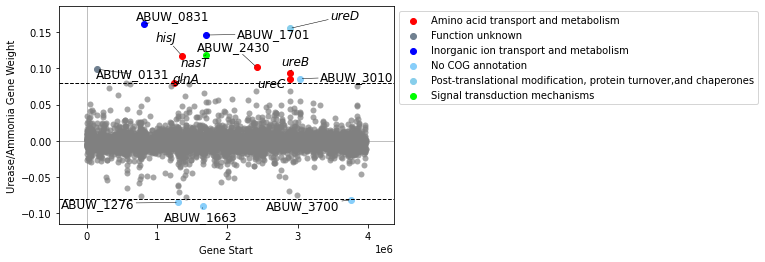

In [22]:
plot_gene_weights(ica_data, 'Urease/Ammonia')
#plt.savefig('../figures/Figure2_UreaseAmmonia01.svg')

In [17]:
ica_data.view_imodulon('Urease/Ammonia')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_0131,0.098905,ABUW_0131,NaN,145833,146336,-,2-oxo-4-hydroxy-4-carboxy-5-ureidoimidazoline ...,Function unknown,NaN,NaN
ABUW_0831,0.160620,ABUW_0831,NaN,808039,809226,-,ammonium transporter,Inorganic ion transport and metabolism,NaN,NaN
ABUW_1207,0.080458,glnA,NaN,1247247,1248662,+,glutamine synthetase%2C type I,Amino acid transport and metabolism,NaN,NtrC
ABUW_1276,-0.085183,ABUW_1276,NaN,1302135,1302389,+,hypothetical protein,No COG annotation,NaN,Phage region 3
ABUW_1339,0.117574,hisJ,NaN,1352572,1353357,+,histidine-binding periplasmic protein,Amino acid transport and metabolism,NaN,NaN
ABUW_1663,-0.089575,ABUW_1663,NaN,1655820,1655993,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_1701,0.146069,ABUW_1701,NaN,1697643,1698653,-,putative nitrate transport protein,Inorganic ion transport and metabolism,NaN,NaN
ABUW_1702,0.118952,nasT,NaN,1698654,1699244,-,response regulator protein,Signal transduction mechanisms,NaN,NaN
ABUW_2430,0.101473,ABUW_2430,NaN,2418995,2419606,+,transporter%2C LysE family,Amino acid transport and metabolism,NaN,NaN
ABUW_2882,0.084779,ureC,NaN,2890034,2891734,-,urease%2C alpha subunit,Amino acid transport and metabolism,NaN,NaN


## Activity analysis in media (M9 +/- AA) 

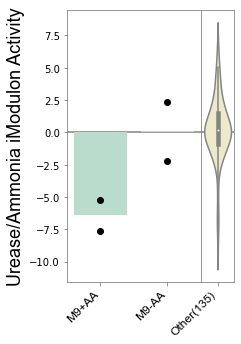

In [66]:
from pymodulon import io

import itertools as it
from collections import OrderedDict
%matplotlib inline

imod = 'Urease/Ammonia'

# should have the form {'project1': ['samp1', 'samp2'],
#                       'project2': ['samp1', 'samp2']}

samples = OrderedDict({'AB5075_med': ['M9-AA',
                     'M9+AA']})

# double check to make sure labels match the samples
labels = ["M9-AA", "M9+AA"]

err = 'Number of samples does not match the number of labels'
assert(len(list(it.chain(*samples.values()))) == len(labels)), err



cmap = plt.cm.get_cmap("Pastel2", 8)
colors = cmap(np.arange(cmap.N))

def get_mean(group):
    return [ica_data.A.loc[imod, grp.index].mean() for idx, grp in group.groupby('condition')]

# change [10,5] to change the size and shape of the plot
width_spaces = [len(samples[i]) for i in samples]
width_spaces.append(0.5)
fig, axes = plt.subplots(1, len(samples) + 1, figsize=[3,5], sharey=True,
                         gridspec_kw={'width_ratios': width_spaces})
plt.subplots_adjust(wspace=0, hspace=0)

used_index = []
for ax, prj, clr in zip(axes, samples, colors):
    cond = samples[prj]
    samps = ica_data.sample_table[(ica_data.sample_table.project == prj) &
                                 (ica_data.sample_table.condition.isin(cond))]
    used_index.extend(samps.index)
    bp = sns.barplot(x=np.arange(len(cond)), y=get_mean(samps), ax=ax, color=clr,
                    dodge=False)
   
    for xl, sgroup in zip(bp.get_xticks(), samps.groupby('condition')):
        sidx, sgrp = sgroup
        ax.scatter([xl] * len(sgrp), ica_data.A.loc[imod, sgrp.index], color='black',
                  zorder=10)
    new_width = 0.25 * len(cond)
    ax.hlines(0, 0 - new_width, len(cond), color='gray', zorder=-1)
    ax.set_xlim(0 - new_width, len(cond) - new_width)
    ax.set_xticklabels([labels.pop() for i in range(len(cond))],
                       rotation=45, ha='right', fontname='Arial', fontsize=12)

rest = ica_data.A.loc[imod, [i for i in ica_data.A if i not in used_index]]
sns.violinplot(x=[1] * len(rest), y=rest, ax=axes[-1], color='#f2efc7')

#clear ticks
for a in axes:
    a.tick_params(color='gray')
    for spine in a.spines.values():
        spine.set_edgecolor('gray')
for a in axes[1:]:
    a.tick_params(left=False)

axes[-1].set_ylabel('')
axes[-1].hlines(0, -2, 2, color='gray', zorder=-1)
axes[-1].set_xlim(-0.5, 0.5)
axes[-1].set_xticklabels([f'Other({len(rest)})'], rotation=45, ha='right',
                         fontname='Arial', fontsize=12)

axes[0].set_ylabel(f'{imod} iModulon Activity', fontname='Arial', fontsize=18)

#plt.savefig("../figures/Figure2_UreaseAmmonia02.svg",transparent = True)